In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy

In [2]:
# Load data
equal_days = pd.read_csv("input/06_12_24_ED_WL_24h.csv") 
long_days = pd.read_csv("input/25_11_24_LD_WL_24h.csv")
short_days = pd.read_csv("input/03_12_24_SD_WL_24h.csv")
onehr_pulse = pd.read_csv("input/10_12_24_1H_WL_24h.csv")


In [3]:

def create_cell_counts(data):
    total_cells = data.copy()
    total_cells.iloc[:, 2:] = total_cells.iloc[:, 2:].mul(3)  # data is provided in cells/mL, need to multiply this by 3 as the cells are seeded/suspended in 3mL of media
    grouped_cells = total_cells.groupby(['Timepoint'])  # want the number of cells at each timepoint
    mean_cells = grouped_cells.agg(['mean', 'sem'])  # use SEM not SD as this demonstrates the variance a bit better
    
    formatted_df = mean_cells.copy()
    formatted_df = formatted_df.reindex(["ZT3", "ZT9", "ZT15", "ZT21"])  # order becomes messed up following grouping
    
    formatted_df = formatted_df.drop(formatted_df.columns[[0,1]], axis=1)  # remove well numbers from the data, leaving the timepoints, live, dead and total counts (mean and SEM)
    formatted_df.columns = ['Live mean', 'Live sem', 'Dead mean', 'Dead sem', 'Total mean', 'Total sem']
    
    return formatted_df

equal_day_counts = create_cell_counts(equal_days)
long_day_counts = create_cell_counts(long_days)
short_day_counts = create_cell_counts(short_days)
onehr_pulse_counts = create_cell_counts(onehr_pulse)

equal_day_counts.head()

,Live mean,Live sem,Dead mean,Dead sem,Total mean,Total sem
Timepoint,,,,,,
ZT3,852750.000000,39193.792992,86465.000000,15191.024488,940000.000000,39611.178404
ZT9,773454.545455,88952.833634,119487.272727,21931.535000,892909.090909,100184.870437
ZT15,805846.153846,64375.585250,121029.230769,23812.267536,927000.000000,74267.965969
ZT21,827250.000000,64237.971991,92215.000000,15831.253540,919250.000000,72931.903170


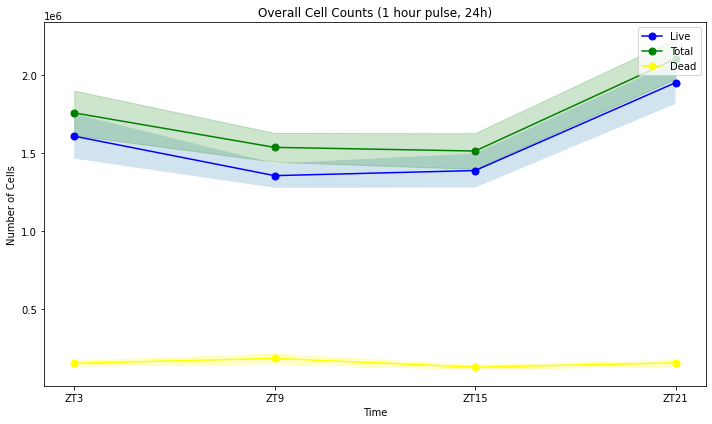

In [4]:
# turning the figure-making code for the overall cell counts (live, dead, total) into a function for ease

def plot_overall_counts(formatted_data, figure_title, save_filepath):
    fig, ax1 = plt.subplots(figsize=(10,6))
    line1, = ax1.plot(formatted_data.index, formatted_data['Live mean'], color='blue', marker='o', markersize=7, label='Live mean')
    ax1.fill_between(formatted_data.index,
                     formatted_data['Live mean'] - formatted_data['Live sem'],
                     formatted_data['Live mean'] + formatted_data['Live sem'],
                     alpha=0.2)
    line2, = ax1.plot(formatted_data.index, formatted_data['Total mean'], color='green', marker='o', markersize=7, label='Total mean')
    ax1.fill_between(formatted_data.index,
                     formatted_data['Total mean'] - formatted_data['Total sem'],
                     formatted_data['Total mean'] + formatted_data['Total sem'], 
                     color='green', alpha=0.2)
    line3, = ax1.plot(formatted_data.index, formatted_data['Dead mean'], color='yellow', marker='o', markersize=7, label='Dead mean')
    ax1.fill_between(formatted_data.index,
                     formatted_data['Dead mean'] - formatted_data['Dead sem'],
                     formatted_data['Dead mean'] + formatted_data['Dead sem'],
                     color='yellow', alpha=0.2)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Number of Cells')
    plt.legend([line1, line2, line3], ['Live', 'Total', 'Dead'], loc="upper right")
    plt.title(f"Overall Cell Counts ({figure_title})")
    fig.tight_layout()
    plt.savefig(f"figures/{save_filepath}.png")
    plt.show()


plot_overall_counts(onehr_pulse_counts, '1 hour pulse, 24h', '24h_cellcounts_1HP_11_12_24')



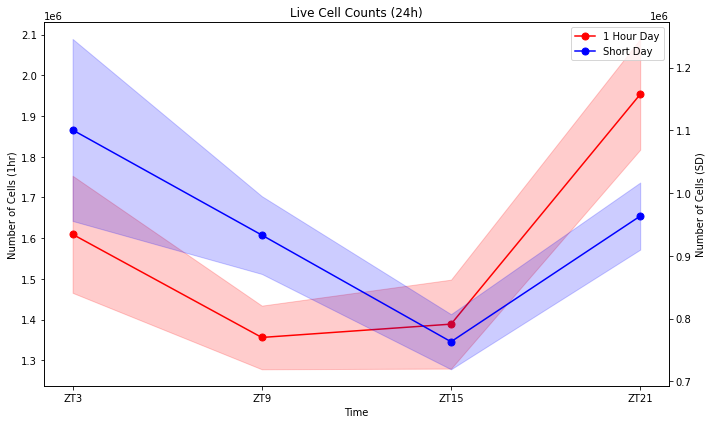

In [8]:
# turning the figure-making code for comparing the live cell counts of two conditions into a function for ease.

def plot_live_counts(condition1, c1_ID, c1_name, condition2, c2_ID, c2_name, save_filepath):
    
    '''short days = blue
    long days = orange
    equal days = green
    one hour exposure (pulse) = red'''
    
    fig, ax1 = plt.subplots(figsize=(10,6))
    line1, = ax1.plot(condition1.index, condition1['Live mean'], color='red', marker='o', markersize=7, label='Live mean')
    ax1.fill_between(condition1.index,
                 condition1['Live mean'] - condition1['Live sem'],
                 condition1['Live mean'] + condition1['Live sem'],
                 color='red', alpha=0.2)
    ax1.set_xlabel('Time')
    ax1.set_ylabel(f'Number of Cells ({c1_ID})')
    ax1.tick_params(axis='y')
     
     # create secondary y-axis for condition 2 (LD)
    ax2 = ax1.twinx()
     
    line2, = ax2.plot(condition2.index, condition2['Live mean'], color='blue', marker='o', markersize=7, label='Live mean')
    ax2.fill_between(condition2.index,
                 condition2['Live mean'] - condition2['Live sem'],
                 condition2['Live mean'] + condition2['Live sem'],
                 color='blue', alpha=0.2)
    ax2.set_ylabel(f'Number of Cells ({c2_ID})')
    ax2.tick_params(axis='y')
    plt.legend([line1, line2], [f'{c1_name} Day', f'{c2_name} Day'], loc="upper right")
    plt.title('Live Cell Counts (24h)')
    fig.tight_layout()
    plt.savefig(f'figures/{save_filepath}.png')
    plt.show()

 
plot_live_counts(onehr_pulse_counts, "1hr", "1 Hour", short_day_counts, "SD", "Short", "24h_cellcounts_1H_SD_11_12_24")

# onehr_pulse_counts, "1hr", "1 Hour"
# equal_day_counts, "ED", "Equal"
# long_day_counts, "LD", "Long",
